# Setup
Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 15679, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15679 (delta 1), reused 2 (delta 0), pack-reused 15672
Receiving objects: 100% (15679/15679), 14.45 MiB | 34.57 MiB/s, done.
Resolving deltas: 100% (10742/10742), done.
/opt/app-root/src/yolov5/yolov5

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Install opencv-python-headless many to avoid *ImportError: libGL.so.1: cannot open shared object file: No such file or directory*

In [3]:
!pip install opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 MB 269.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-168-gec2b853 Python-3.9.14 torch-1.13.1+cu117 CPU


Setup complete ✅ (8 CPUs, 30.6 GB RAM, 91.8/299.5 GB disk)


# Data preparation
Data preparation is usually a big task. You might have to clean the data. Label the data - in computer vision it means creating the bounding boxes. And also split the data into training and test data sets.

We are lucky, because this (hard) work has been done already. You just need to Unzip the images and annotations.

**Unzip the images and annotations:**

In [8]:
!ls -l /opt/app-root/src/pokedex-demo/database/PokemonYOLO/*

-rw-r--r--. 1 1014230000 1014230000 1740 May 19 11:04 /opt/app-root/src/pokedex-demo/database/PokemonYOLO/data.yaml
-rw-r--r--. 1 1014230000 1014230000  138 May 19 11:04 /opt/app-root/src/pokedex-demo/database/PokemonYOLO/README.dataset.txt
-rw-r--r--. 1 1014230000 1014230000  424 May 19 11:04 /opt/app-root/src/pokedex-demo/database/PokemonYOLO/README.roboflow.txt

/opt/app-root/src/pokedex-demo/database/PokemonYOLO/test:
total 32
drwxr-sr-x. 2 1014230000 1014230000 16384 May 19 11:04 images
drwxr-sr-x. 2 1014230000 1014230000 16384 May 19 11:04 labels

/opt/app-root/src/pokedex-demo/database/PokemonYOLO/train:
total 156
drwxr-sr-x. 2 1014230000 1014230000 77824 May 19 11:04 images
drwxr-sr-x. 2 1014230000 1014230000 81920 May 19 11:04 labels

/opt/app-root/src/pokedex-demo/database/PokemonYOLO/valid:
total 52
drwxr-sr-x. 2 1014230000 1014230000 28672 May 19 11:04 images
drwxr-sr-x. 2 1014230000 1014230000 24576 May 19 11:04 labels


**View example image:**

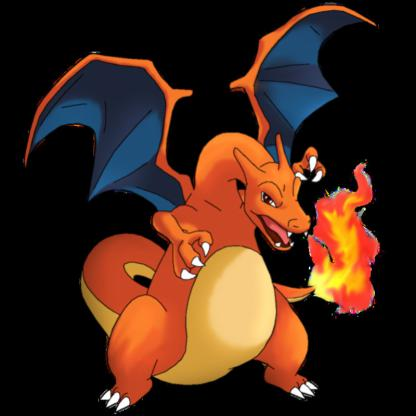

In [9]:
# View image 
display.Image(filename='/opt/app-root/src/pokedex-demo/database/PokemonYOLO/valid/images/fed6277326774a829feb7dd4a53217bc_jpg.rf.b74842621792ae50b807f8f511bce674.jpg', width=600)

**Explore the Yolo annotation for the image:**

Let's have look at the annotation file for the image. It contains two "bent".

In [10]:
# Show annotation
!cat /opt/app-root/src/pokedex-demo/database/PokemonYOLO/valid/labels/fed6277326774a829feb7dd4a53217bc_jpg.rf.b74842621792ae50b807f8f511bce674.txt

13 0.4879807692307692 0.5036057692307693 0.8870192307692307 0.9915865384615384

# Start model training
Train a YOLOv5m model on the metal-nut data by specifying dataset, batch-size, image size and pretrained --weights yolov5m.pt. Pretrained weights are auto-downloaded from the latest [YOLOv5 release](https://github.com/ultralytics/yolov5/releases).

Before starting, check this:

* *--workers 0* is a workaround for problem with shared memory limit
* Or, extend the share memory for your notebook as describe in the local README.md and remove --workers 0 below.

In [12]:
!python train.py --img 640 --batch 16 --epochs 600 --data /opt/app-root/src/pokedex-demo/database/PokemonYOLO/data.yaml --weights yolov5m.pt 

train: weights=yolov5m.pt, cfg=, data=/opt/app-root/src/pokedex-demo/database/PokemonYOLO/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=600, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.9.14 torch-1.13.1+cu117 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.